In [ ]:
!pip -q install fastai
!pip -q install gradio
!pip -q install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:

In [ ]:
from fastai.vision.all import *
import gradio as gr
import timm

#Train

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

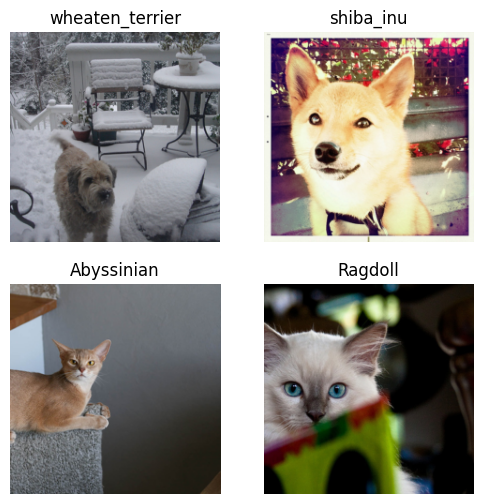

In [ ]:
dls.show_batch(max_n=4)

In [ ]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,1.092769,0.265698,0.083897,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.259473,0.237080,0.079838,01:06
1,0.190686,0.208860,0.072395,01:07
2,0.117254,0.197117,0.066306,01:05


In [ ]:
learn.export('model.pkl')

#App

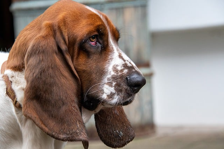

In [ ]:
im = PILImage.create("basset.jpg")
im.thumbnail((224,224))
im

In [ ]:
learn = load_learner("/content/drive/MyDrive/Colab Notebooks/arquivos/model.pkl")

In [ ]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([4.3269e-09, 6.7605e-12, 4.2952e-10, 1.3701e-10, 7.5112e-12, 8.9356e-10,
         2.3650e-10, 3.0961e-09, 7.3147e-11, 2.7763e-09, 3.8716e-08, 2.7482e-10,
         1.7933e-10, 1.4678e-09, 1.0000e+00, 1.0488e-06, 4.0461e-09, 2.4975e-10,
         1.0766e-08, 2.7441e-08, 4.5743e-08, 2.0008e-09, 8.8661e-11, 9.0290e-11,
         1.8452e-08, 2.6514e-09, 1.5768e-10, 3.9309e-10, 6.8686e-11, 9.7567e-10,
         9.5737e-08, 3.1036e-09, 1.8802e-10, 1.5152e-10, 4.7141e-11, 2.8802e-10,
         9.3890e-10]))

In [ ]:
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [ ]:
classify_image(im)

{'Abyssinian': 4.3268992833134234e-09,
 'Bengal': 6.760512722553402e-12,
 'Birman': 4.295190869640919e-10,
 'Bombay': 1.3700761358759195e-10,
 'British_Shorthair': 7.511232955059732e-12,
 'Egyptian_Mau': 8.935621131911375e-10,
 'Maine_Coon': 2.364955176137329e-10,
 'Persian': 3.096054967954842e-09,
 'Ragdoll': 7.314700234406502e-11,
 'Russian_Blue': 2.776254781622356e-09,
 'Siamese': 3.871610232408784e-08,
 'Sphynx': 2.74819861312281e-10,
 'american_bulldog': 1.793325071774987e-10,
 'american_pit_bull_terrier': 1.4678355197972337e-09,
 'basset_hound': 0.9999986886978149,
 'beagle': 1.048846343110199e-06,
 'boxer': 4.046104340460488e-09,
 'chihuahua': 2.4975141399430356e-10,
 'english_cocker_spaniel': 1.0765970337445196e-08,
 'english_setter': 2.7440529848377082e-08,
 'german_shorthaired': 4.574313550165243e-08,
 'great_pyrenees': 2.000847709737741e-09,
 'havanese': 8.866078704539149e-11,
 'japanese_chin': 9.028952585588002e-11,
 'keeshond': 1.845223884799907e-08,
 'leonberger': 2.65140

In [ ]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [ ]:
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


In [ ]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [ ]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2547e+00,  1.9186e+00,  1.2199e+00,  1.0393e+00, -9.0902e-05,
          7.6619e-01,  8.8724e-01,  1.6313e+00,  7.0446e-01,  3.2896e+00,
          7.8638e-01, -6.3233e-04,  1.0018e+00, -2.4199e-03,  3.2973e+00,
          7.3121e-05,  1.9858e+00,  1.0196e+00,  4.4539e+00,  2.5485e-01,
          2.7248e+00,  9.2481e-01,  1.2372e+00,  3.6427e-03,  1.7872e+00,
          5.4271e-01,  4.6269e+00,  1.2186e-02, -3.6542e-05,  3.4512e+00,
          1.3527e+00,  4.1273e+00,  2.6868e+00,  4.1204e+00,  3.3998e+00,
          8.4878e-01,  7.3629e-01,  3.9803e+00,  1.2859e+00,  6.4154e-01,
          2.6916e+00,  1.1183e+00,  1.1691e+00,  5.5291e-01,  2.3345e+00,
          5.9046e-04,  9.6942e-01,  1.5096e-03,  1.1980e+00,  1.7878e+00,
          4.0180e-01,  4.4997e-01,  9.7143e-01,  3.9891e+00,  6.5768e-01,
          6.8934e-01,  9.8482e-01,  2.7059e+00,  1.2157e+00,  7.6348e-01,
          3.3017e+00,  1.6202e+00,  9.5612e-01,  2.1222e+00,  6.2964e-01,
          4.034

In [ ]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 2.2695e-02, -1.6933e-03,  4.0384e-02,  ...,  1.5436e-03,
          -4.5162e-02,  8.1153e-03],
         [-1.4387e-01,  1.6994e-02,  2.5840e-02,  ...,  1.2493e-02,
          -1.0440e-01,  5.6305e-02],
         [-6.5679e-02, -3.2982e-02,  5.9090e-03,  ..., -4.1683e-02,
           6.6034e-02, -4.0288e-02],
         ...,
         [-8.7755e-03,  6.9702e-02,  8.6083e-05,  ...,  4.1535e-03,
           4.1466e-02, -1.9084e-02],
         [ 2.0194e-03,  3.2140e-02,  2.9723e-02,  ..., -2.9903e-02,
          -3.0454e-02,  5.5471e-02],
         [ 1.2102e-01, -3.5462e-02, -4.4749e-03,  ..., -6.5880e-03,
           2.3672e-02, -1.1339e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.4048, -0.7419, -0.4233, -0.1649, -0.3026, -0.1897, -0.5535, -0.6271,
         -0.3008, -0.4253, -0.5995, -0.4106, -0.2173, -1.7935, -0.3172, -0.1164,
         -0.4484, -0.2848, -0.4343, -0.4945, -0.4064, -1.1400, -0.6754, -1.7236,
         -0.2954, -0.2655, -0.2188, -0.3912, 

#How to fit a function to data

In [ ]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

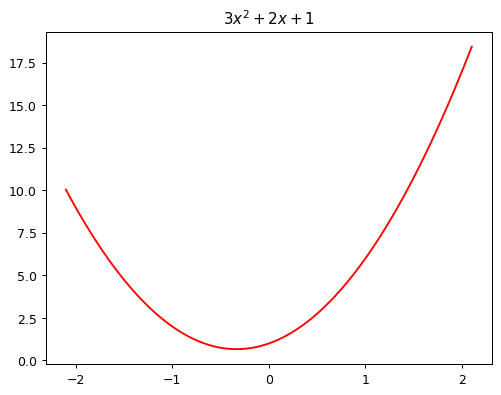

In [ ]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [ ]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [ ]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

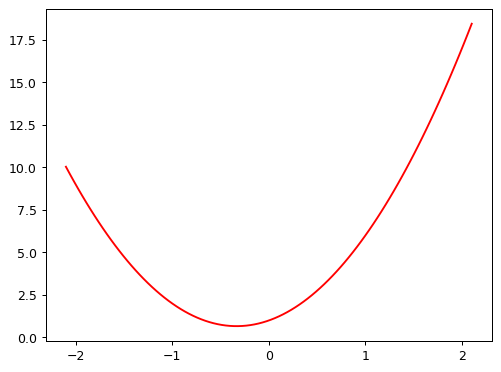

In [ ]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [ ]:

def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [ ]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

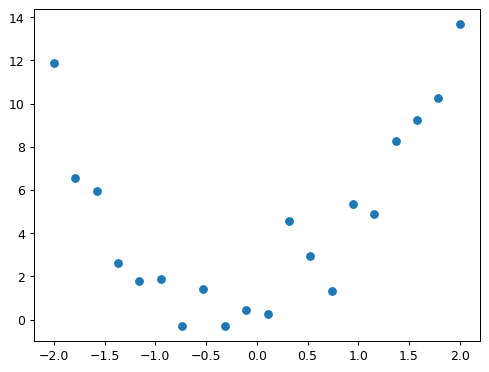

In [ ]:
plt.scatter(x,y);

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

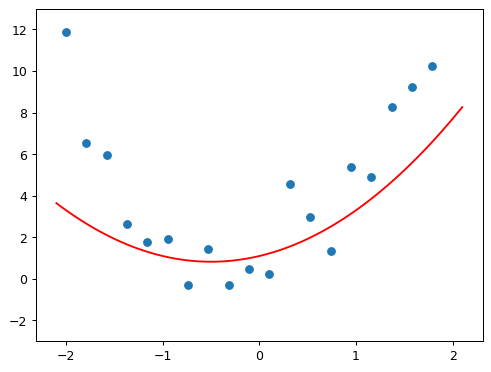

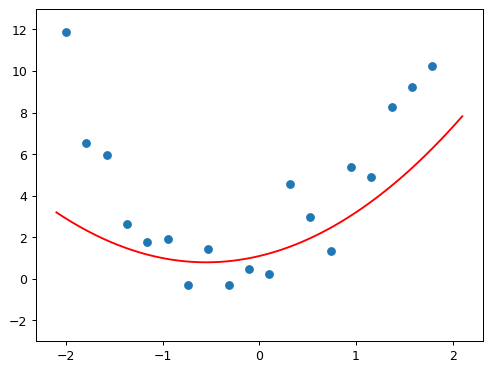

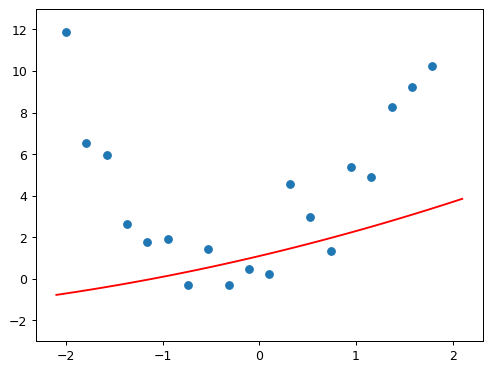

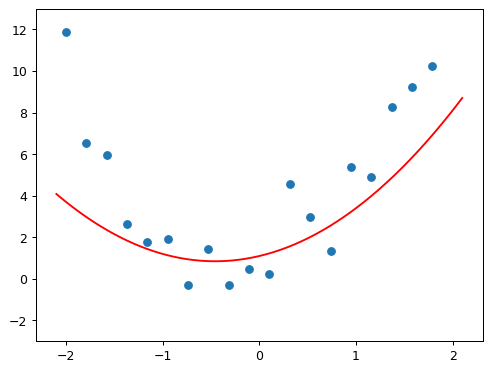

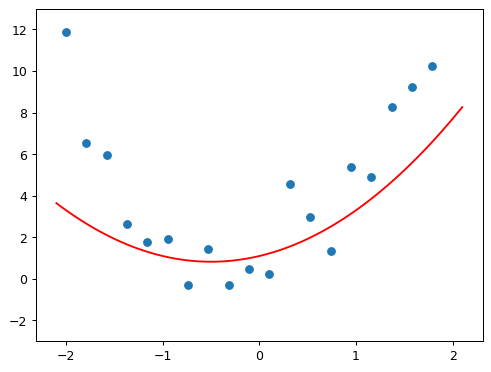

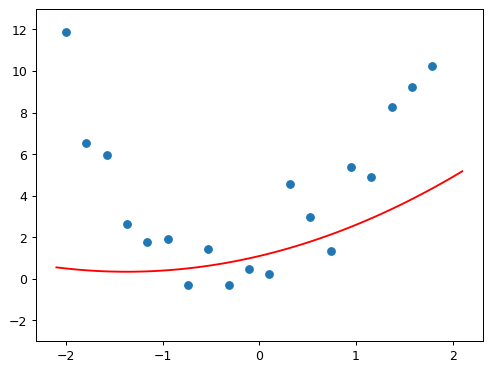

In [ ]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))


In [ ]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

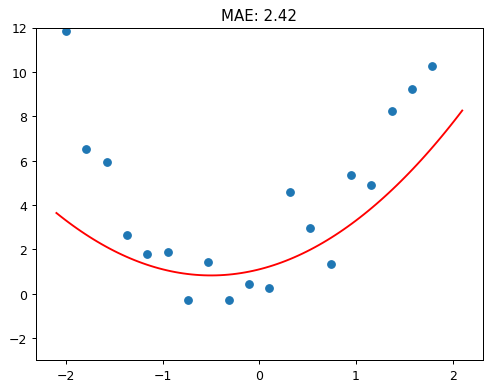

In [ ]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")


In [ ]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [ ]:
quad_mae([1.1, 1.1, 1.1])

tensor(2.4219, dtype=torch.float64)

In [ ]:
abc = torch.tensor([1.1,1.1,1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [ ]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [ ]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)

print(f'loss={loss:.2f}')

loss=2.40


In [ ]:
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=2.40
step=1; loss=2.36
step=2; loss=2.30
step=3; loss=2.21
step=4; loss=2.11
step=5; loss=1.98
step=6; loss=1.85
step=7; loss=1.72
step=8; loss=1.58
step=9; loss=1.46


In [ ]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

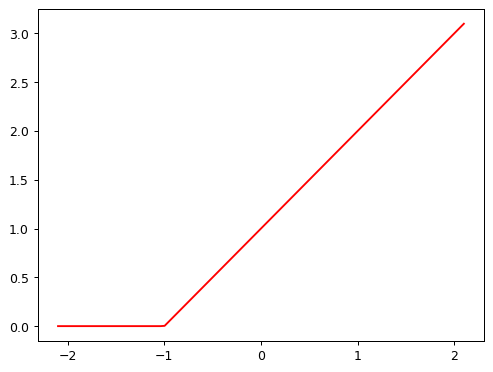

In [ ]:
plot_function(partial(rectified_linear, 1,1))

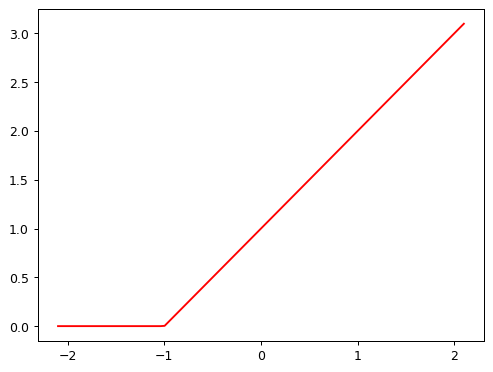

In [ ]:
import torch.nn.functional as F
def rectified_linear2(m,b,x):
  return F.relu(m*x+b)
plot_function(partial(rectified_linear2, 1,1))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

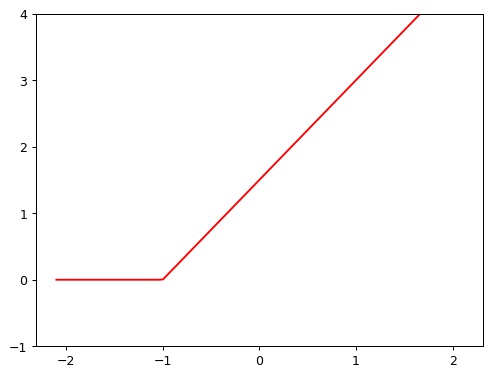

In [ ]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

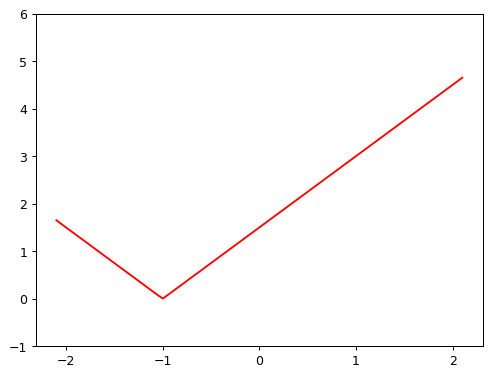

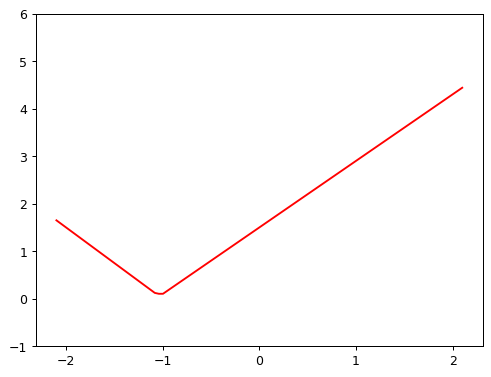

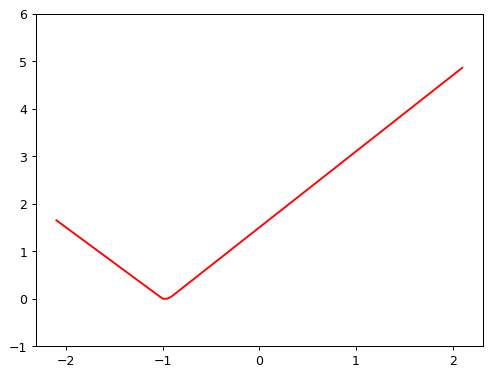

In [ ]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))